In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,roc_curve, roc_auc_score

In [34]:
metrics = catalog.load('metrics_lr') 
predictions = catalog.load('predictions_lr') 
predicted_probabilities = catalog.load('predicted_probabilities_lr') 


print(metrics)
print(predictions.head())
print(predicted_probabilities.head())

[03/29/25 12:50:48] INFO     Loading data from metrics_lr (CSVDataset)...                       ]8;id=289469;file://C:\ProgramData\anaconda3\envs\kedro_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=747135;file://C:\ProgramData\anaconda3\envs\kedro_env\Lib\site-packages\kedro\io\data_catalog.py#401\401]8;;\

                    INFO     Loading data from predictions_lr (CSVDataset)...                   ]8;id=219279;file://C:\ProgramData\anaconda3\envs\kedro_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=388353;file://C:\ProgramData\anaconda3\envs\kedro_env\Lib\site-packages\kedro\io\data_catalog.py#401\401]8;;\

                    INFO     Loading data from predicted_probabilities_lr (CSVDataset)...       ]8;id=575686;file://C:\ProgramData\anaconda3\envs\kedro_env\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=686100;file://C:\ProgramData\anaconda3\envs\kedro_env\Lib\site-packages\kedro\io\data_catalog.py#401\401]8;;\

   accuracy  precision    recall  f1_score   roc_auc
0  0.569633   0.552675  0.517295    0.5344  0.602203
   actual  predicted
0     0.0        0.0
1     0.0        0.0
2     0.0        0.0
3     1.0        1.0
4     0.0        1.0
   probability
0     0.419841
1     0.456857
2     0.423887
3     0.622676
4     0.613360


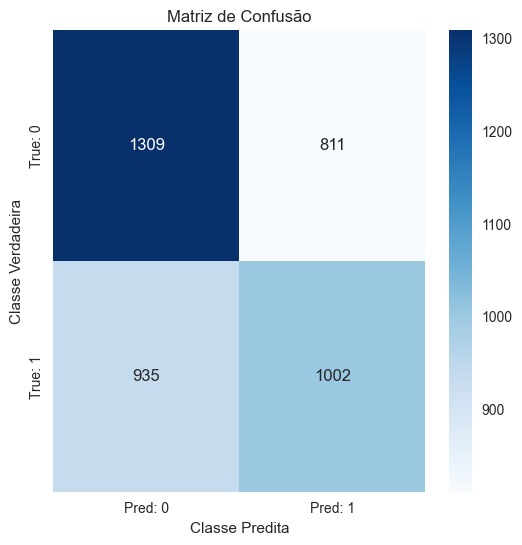

In [33]:
# Gerar a matriz de confusão
cm = confusion_matrix(predictions["actual"], predictions["predicted"])

# Criar o gráfico
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred: 0", "Pred: 1"], yticklabels=["True: 0", "True: 1"])
plt.title("Matriz de Confusão")
plt.ylabel("Classe Verdadeira")
plt.xlabel("Classe Predita")
plt.savefig("data/08_reporting/confusion_matrix_report_LR.png")
plt.show()

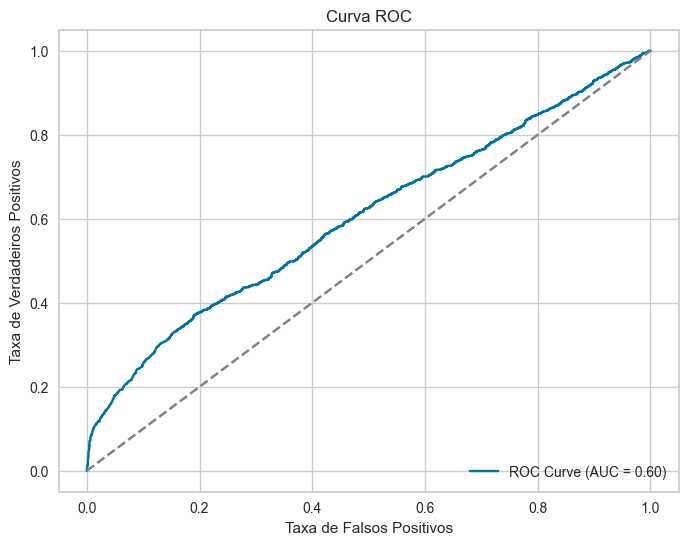

In [30]:


# Calcular a Curva ROC
fpr, tpr, _ = roc_curve(predictions["actual"], predicted_probabilities["probability"])
roc_auc = roc_auc_score(predictions["actual"], predicted_probabilities["probability"])

# Plotar a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.savefig("data/08_reporting/roc_curve_report_LR.png")
plt.show()



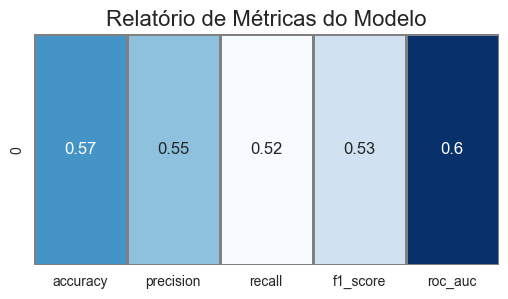

In [31]:
# Criar um gráfico com a tabela
plt.figure(figsize=(6, 3))
sns.heatmap(metrics, annot=True, cmap="Blues", cbar=False, linewidths=1, linecolor='gray')
# Título do gráfico
plt.title("Relatório de Métricas do Modelo", fontsize=16)
# Mostrar o gráfico
plt.savefig("data/08_reporting/metrics_report_table_LR.png", bbox_inches="tight")
plt.show()

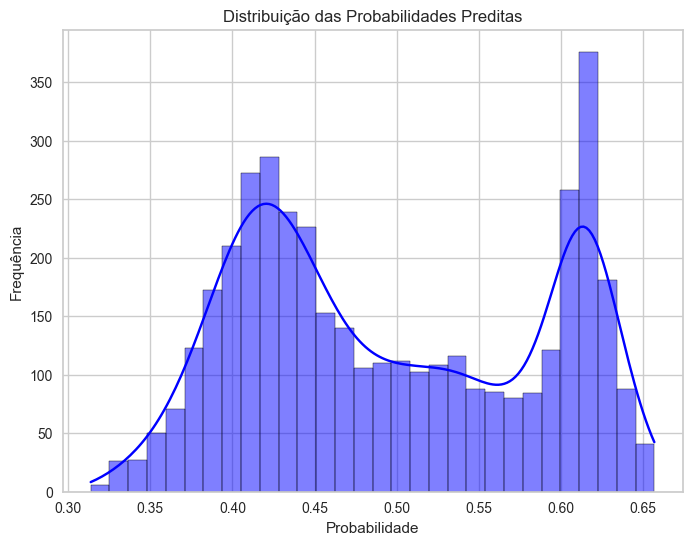

In [32]:
# Visualizar as distribuições de probabilidades
plt.figure(figsize=(8, 6))
sns.histplot(predicted_probabilities['probability'], kde=True, bins=30, color="blue")
plt.title("Distribuição das Probabilidades Preditas")
plt.xlabel("Probabilidade")
plt.ylabel("Frequência")
plt.savefig("data/08_reporting/distribuitions_LR.png", bbox_inches="tight")
plt.show()